In [1]:

from pyspark.sql import SparkSession 

In [2]:
spark = SparkSession.builder.appName("Python Spark SQL basic example").config("spark.some.config.option", "some-value").getOrCreate()

In [3]:
df = spark.read.options(header = True, inferSchema=True).csv("housing.csv")

In [4]:
df.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

In [12]:
from pyspark.sql.types import *
from pyspark import SparkContext, SparkConf

In [14]:
sc = spark.sparkContext

In [15]:
sc

<SparkContext master=local[*] appName=Python Spark SQL basic example>

In [19]:
df.select("total_rooms").show(5)

+-----------+
|total_rooms|
+-----------+
|      880.0|
|     7099.0|
|     1467.0|
|     1274.0|
|     1627.0|
+-----------+
only showing top 5 rows



In [21]:
df.describe().show()

+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|summary|          longitude|         latitude|housing_median_age|       total_rooms|    total_bedrooms|        population|       households|     median_income|median_house_value|ocean_proximity|
+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|  count|              20640|            20640|             20640|             20640|             20433|             20640|            20640|             20640|             20640|          20640|
|   mean|-119.56970445736148| 35.6318614341087|28.639486434108527|2635.7630813953488| 537.8705525375618|1425.4767441860465|499.5396802325581|3.8706710029070246|206855.81690891474|           null|
| stddev|  2.0035317

In [22]:
df.columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [23]:
df.explain()

== Physical Plan ==
*(1) FileScan csv [longitude#81,latitude#82,housing_median_age#83,total_rooms#84,total_bedrooms#85,population#86,households#87,median_income#88,median_house_value#89,ocean_proximity#90] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/Users/subbuch/housing.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<longitude:double,latitude:double,housing_median_age:double,total_rooms:double,total_bedroo...


In [24]:
df.count()

20640

In [26]:
df.dtypes

[('longitude', 'double'),
 ('latitude', 'double'),
 ('housing_median_age', 'double'),
 ('total_rooms', 'double'),
 ('total_bedrooms', 'double'),
 ('population', 'double'),
 ('households', 'double'),
 ('median_income', 'double'),
 ('median_house_value', 'double'),
 ('ocean_proximity', 'string')]

In [34]:
#filtering
df[df.total_rooms <10].show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -117.79|   35.21|               4.0|        2.0|           2.0|       6.0|       2.0|        2.375|          137500.0|         INLAND|
|  -116.95|   33.86|               1.0|        6.0|           2.0|       8.0|       2.0|        1.625|           55000.0|         INLAND|
|   -122.5|   37.79|              52.0|        8.0|           1.0|      13.0|       1.0|      15.0001|          500001.0|       NEAR BAY|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+



In [33]:
df[(df.total_rooms <10) & (df.total_bedrooms ==2)].show() 

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -117.79|   35.21|               4.0|        2.0|           2.0|       6.0|       2.0|        2.375|          137500.0|         INLAND|
|  -116.95|   33.86|               1.0|        6.0|           2.0|       8.0|       2.0|        1.625|           55000.0|         INLAND|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+



In [38]:
#Add column
df.withColumn('totalrooms', 1 / df.total_rooms).show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|          totalrooms|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+--------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|0.001136363636363...|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|1.408649105507818E-4|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|6.816632583503749E-4|
|  -122.25|   37.85|              52.0|     12

In [40]:
#Fill NULLs 

df.fillna(0).show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

In [59]:
#AGGREGATION

aggdata = df.groupby(['total_rooms','total_bedrooms']).agg({'population': 'mean', 'households': 'min'}).show(5)

+-----------+--------------+---------------+---------------+
|total_rooms|total_bedrooms|min(households)|avg(population)|
+-----------+--------------+---------------+---------------+
|     1114.0|         206.0|          207.0|          425.0|
|     2605.0|         474.0|          433.0|         1568.0|
|     6875.0|        1439.0|         1307.0|         2889.0|
|     6265.0|         908.0|          872.0|         3326.0|
|       60.0|          15.0|           25.0|           42.0|
+-----------+--------------+---------------+---------------+
only showing top 5 rows



In [49]:
# STANDARD TRANSFORMATIONS
import pyspark.sql.functions as F

df.withColumn('income', F.log(df.median_income)).show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|            income|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|2.1192870596019593|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|  2.11642417527737|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|1.9820216379722526|
|  -122.25|   37.85|              52.0|     1274.0|       

In [54]:
# Row Conditional statements

df.withColumn('income' , F.when(df.total_rooms >10,1).when(df.total_bedrooms == 6, 2).otherwise(3)).show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|income|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|     1|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|     1|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|     1|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NE

In [58]:
from pyspark.sql.types import DoubleType

fn = F.udf(lambda x: x+1, DoubleType())
df.withColumn('income', fn(df.median_income)).show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|income|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|9.3252|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|9.3014|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|8.2574|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NE

In [62]:
# MERGE/JOIN DATAFRAMES

aggdata.join(df, on='total_rooms')

AttributeError: 'NoneType' object has no attribute 'join'

In [63]:
# SUMMARY STATISTICS  count, mean, stddev, min, max 

df.describe().show()

+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|summary|          longitude|         latitude|housing_median_age|       total_rooms|    total_bedrooms|        population|       households|     median_income|median_house_value|ocean_proximity|
+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|  count|              20640|            20640|             20640|             20640|             20433|             20640|            20640|             20640|             20640|          20640|
|   mean|-119.56970445736148| 35.6318614341087|28.639486434108527|2635.7630813953488| 537.8705525375618|1425.4767441860465|499.5396802325581|3.8706710029070246|206855.81690891474|           null|
| stddev|  2.0035317

In [65]:
df.selectExpr("percentile_approx(total_rooms,array()) as rooms").show()

+-----+
|rooms|
+-----+
| null|
+-----+



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114de8b00>,
      dtype=object)

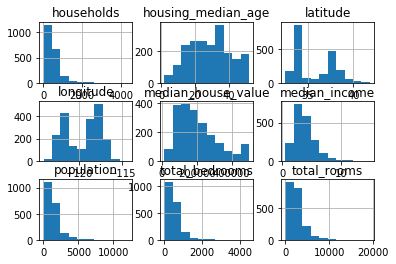

In [70]:
# HISTOGRAM
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  

df.sample(False, 0.1).toPandas().hist()

In [71]:
# SQL 

df.createOrReplaceTempView('housetable')

In [75]:
df2 = spark.sql("select * from housetable")  # it dosen't show any data until you called action

df3 = spark.sql("select * from housetable").show(5)

# NOTE: use pyspark.sql.funtions and other bulitin functions 

# Use the same version of python and packages on cluster driver to avoid issues 

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

In [ ]:
#. THINGS NOT TO DO IN pyspark

# 1. try to iterate through rows
# 2.Hard code a master in your driver
#.   .Use spark-submit for that 

# 3. df.toPandas().head()
 #    .instead do : df.limit(5).toPandas()    (you can do that)
    

    


In [85]:
# FLINT.  is a timeseries library for Apache Spark 

from ts.flint  import FlintContext
from ts.flint  import TimeSeriesDataFrame
from ts.flint  import summarizers, windows

In [86]:
df = df.withColumn('time', newDf.time.cast("long")).show()

NameError: name 'newDf' is not defined